In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Introduction

On September 28, 1984, the hit single "Let's Go Crazy" by Prince and The Revolution climbed to the top of the U.S. Billboard charts ("Chart History: Prince"), becoming the first song to ever top Billboard despite being marked as "explicit" (Ross). Since then, songs featuring explicit content have become increasingly popular, with recent studies of Billboard chart data revealing that the proportion of explicit Billboard number-one singles has surged from below 10% in 1984 to over 60% in 2017 (Bannister.) This in turn raises the question: **Given the current commercial success of explicit music over non-explicit music, is explicit music also more likely to receive stronger critical reception?**

To answer this question, I began by scraping data from Metacritic (https://www.metacritic.com/music, a website that aggregates various critic reviews of music, among other forms of entertainment) and Genius (https://genius.com/, a website centered around song lyrics and music news). Specifically, I focused on exploring every album in the Metacritic database that was released in the last five years (2015-2019). Using lyrical data from Genius, I computed the specific quantity of explicit lyrics on each of these albums, and found that in general, **neither the presence nor the abundance of explicit lyrics on an album has any significant impact on its critical reception.** It instead seems more likely that music critics' album reviews are still based off a variety of different factors (i.e., production, vocal performance, thematic consistency, etc.) rather than the "explicitness" of an album alone. Therefore, this study certainly undermines the argument that music critics always give more praise to whatever albums are more popular at the moment (considering the current popularity of explicit music), as well as the argument that the mere appearance of explicit lyrics on an album notably harms the album's ability to receive critical acclaim.

<div style="border-bottom: 4px solid #AAA; padding-bottom: 6px; font-size: 16px; font-weight: bold;"></div>

# Data Description

As aforementioned, the dataset utilized in this study (which can be found [here](https://github.com/genghisshyy/INFO_2950_FinalProject/blob/master/data/condensed_albums.csv)) was manually constructed by scraping web data from Metacritic and Genius. We explore this dataset in further detail below:

### What are the observations and the attributes of this dataset?

Each observation in this dataset represents an album, with the entire set of observations representing all albums in the Metacritic database that 1) were released in the 2015-2019 range, and 2) have at least some lyrics available on Genius. (Note: all album data used in this study is accurate as of May 20, 2020.) For each of these 2,816 albums, eight attributes are stored in the dataset:

1. `artist`, the name of the album artist; 
2. `metascore`, the average critic score (on an integer scale from 0-100) that the album received on Metacritic; 
3. `num_lyric_tracks`, the number of album tracks that have lyrics available on Genius;
4. `release_date`, the date on which the album was released;
5. `title`, the title of the album; 
6. `user_score`, the average user score (on a decimal scale from 0.0-10.0) that the album received from Metacritic users;
7. `explicit_count`, the total number of "explicit" words the entire album contains (based off the lyrics available on Genius); and
8. `explicit_avg`, the average number of "explicit" words per track (again, only when considering tracks that have lyrics available on Genius).

Below is the complete list of words considered "explicit" in this study. This is not a comprehensive list of "explicit" words, but rather a manually written compilation of words that are commonly regarded as "explicit" in the music industry.

In [2]:
# The inclusion of these words here is strictly for research purposes.
# They do not in any way represent or convey my personal views.
explicit_list = [
    "arse",
    "ass",
    "asshole",
    "assholes",
    "bastard",
    "bastards",
    "bitch",
    "bitches",
    "bullshit",
    "cocaine",
    "cock",
    "coke",
    "damn",
    "dick",
    "drug",
    "drugs",
    "faggot",
    "faggots",
    "fentanyl",
    "fuck",
    "fucka",
    "fucked",
    "fucker",
    "fuckin",
    "fucking",
    "fucks",
    "goddamn",
    "hell",
    "horseshit",
    "mothafucka",
    "mothafuckas",
    "motherfucka",
    "motherfuckas",
    "motherfucker",
    "motherfuckers"
    "motherfuckin",
    "motherfucking",
    "nigga",
    "niggas",
    "nigger",
    "niggers",
    "perc",
    "percocet",
    "pill",
    "pills",
    "pussy",
    "sex",
    "shit",
    "slut",
    "sluts",
    "whore",
    "whores"
]

### Why was this dataset created?

This dataset was created solely for the purpose of carrying out this study, and therefore is meant to facilitate analysis of any potential relationships between the amount of explicit content in an album and the album’s critical reception.

### Who funded the creation of this dataset?

There were no significant funds necessary to create this dataset, and indeed no grant associated with this dataset either.

### What processes might have influenced what data was observed and recorded and what was not?

For one, Metacritic itself already prevents certain releases from being included in their year-end album rankings, noting, “Only albums with seven or more reviews are eligible. EPs, live albums, box sets, re-issues, and compilations are also excluded” ("Best Music and Albums for 2020"). Therefore, all projects deemed “ineligible” by Metacritic are not included in this study's dataset.

In addition, album lyrics data might not be collected completely for each album, given that Genius does not include a lyrics page for every track of every album in the dataset. (For example, Genius only provides lyrics for one of the eight tracks on *Far From Over* by Vijay Iyer.) Aside from this, part of the lyrics scraping process (described in further detail in the next section) involved manually searching for and recording relevant Genius URLs. Therefore, the potential presence of human error during this process could have led to incorrect or incomplete data being recorded.

Finally, all albums that did not have any lyrics available on Genius were filtered out completely from the dataset. This decision was deemed strictly necessary: for without any available lyrics data, there would be no way of evaluating how much explicit content any of these albums contains.

### What preprocessing was done, and how did the data come to be in the form that you are using?

The process of creating this dataset is explained below:

##### Scraping Basic Album Information from Metacritic

First, data for every album in the Metacritic database that was released in the 2015-2019 range was collected by copying and pasting directly from Metacritic web pages to a Microsoft Excel spreadsheet. (An example of one such web page can be found [here](https://www.metacritic.com/browse/albums/score/metascore/year/filtered?view=condensed&sort=desc).) Overall, data for 3,226 albums was collected, and subsequently arranged in five different columns (one for each year.) In each of these columns, every set of five rows (beginning with the set of rows 0, 1, 2, 3, and 4) represented a single album, with the rows corresponding to the following album data:

- Row 0: the name of the album artist
- Row 1: the metascore, or the average critic score (on a scale from 0-100) that the album received on Metacritic
- Row 2: the title of the album
- Row 3: the average user score (on a scale from 0.0-10.0) that the album received from Metacritic users
- Row 4: the date on which the album was released

With this row structure in mind, the spreadsheet was converted to a CSV file (comma-separated values file), which can be found [here](https://github.com/genghisshyy/INFO_2950_FinalProject/blob/master/data/metacritic_data_updated.csv). This file was then converted to a Pandas DataFrame object for further data processing. From there, by iterating through the values of each column in the DataFrame object (which corresponded to the columns of the spreadsheet), a dictionary representing each album could be constructed for each set of five values, in each of the five columns. An example of one such dictionary is given below:

`{'artist': 'Kacey Musgraves',
'metascore': '89',
'release_date': '30-Mar-18',
'title': 'Golden Hour',
'user_score': '8.6'}`

This process therefore culminated in five lists of dictionaries, one for each year from 2015 to 2019.

##### Scraping Album Lyrics from Genius (Part 1)

To obtain album lyrics data, a Genius URL was dynamically constructed for each album in the dataset, using the artist name and album title (ex: https://genius.com/albums/Solange/When-i-get-home, where "Solange" is the artist name and *When I Get Home* is the album title.) Each of these Genius URLs contains an overview on the album in question, including a tracklist and links to pages for all available track lyrics. Lyrics were then scraped from each of these lyrics pages using the Python libraries `requests` and `BeautifulSoup`, and subsequently stored in the appropriate dictionary to lead to each dictionary featuring the following format:

`{"artist": (name of album artist),
"metascore": (average critic score that album received on Metacritic, on integer scale 0-100),
"release_date": (day on which album was released in the format d-mmm-yy, e.g. 6-Mar-20),
"title": (title of album),
"user_score": (average user score that album received on Metacritic, on decimal scale 0.0-10.0),
"lyrics": (a list of strings, where each string is a concatenation of all lyrics from a single track on the album),
"num_lyric_tracks": (the number of album tracks that had lyrics available on Genius)}`

##### Scraping Lyrics from Genius (Part 2)

At this point, however, preliminary analysis of this dataset revealed that approximately a third of all album entries did not have any scraped lyrics. Granted, some of these albums were found to be purely instrumental records, while other albums simply were not included in the Genius lyrics database. However, it did seem apparent that the appearance of punctuation in the title of an album or the name of its artist was causing invalid Genius URLs to be generated during the initial lyrics scraping process discussed above. Therefore, additional lyrics scraping had to be performed.

More specifically, two new algorithms for lyrics scraping were developed. The first of these (which will be referred to as the "normal alternative" algorithm) replaces all ampersands with the word "and." (For example, if the album *Look Now* by Elvis Costello & The Imposters were to be examined, running this algorithm would lead to https://genius.com/albums/Elvis-costello-and-the-imposters/Look-now being generated as opposed to http://genius.com/albums/Elvis-costello---the-imposters/Look-now like before.) Additionally, this algorithm removes all other punctuation marks as opposed to replacing punctuation marks with spaces. (This was designed to handle specific edge cases such as the one illustrated by *DAMN.* by Kendrick Lamar. Using the initial algorithm, the period at the end of *DAMN.* would be replaced by a space, which in turn led to http://genius.com/albums/Kendrick-lamar/Damn- being generated instead of http://genius.com/albums/Kendrick-lamar/Damn as desired.)

In addition to this updated algorithm, a second algorithm was created, which simply used manually scraped URLs to access lyrics data. In other words, for each album that still did not have any stored lyrics after the initial and the "normal alternative" algorithms were executed, the correct URL (if one existed) was manually recovered through web searches, and subsequently used to scrape all available lyrics data.

##### Gathering Data on Explicit Content for Each Album

Once the lyrics scraping phase had finished, data on the amount of explicit content in each album could be collected. Using the list of explicit words given above in the *"What are the attributes and the attributes of this dataset?"* section, the number of explicit words that appeared in every album's lyrics was recorded, in addition to the average number of explicit words that appear per album track. Both of these attributes were then appropriately stored in the dataset for each of the 3,226 albums.

##### Filtering Out Albums with No Recorded Lyrics

As explained in the previous section *"What processes might have influenced what data was observed and recorded and what was not?"*, there was no simple way of determining the quantity of explicit lyrics on an album if its lyrics were not available on Genius. Therefore, all albums that did not have any lyrics recorded in the dataset were filtered out completely, leaving 2,816 albums behind.

##### Exporting Data to CSV File

Finally, a single list was created, containing all remaining dataset observations. This list was then converted into a Pandas DataFrame object, which was subsequently exported to a CSV file for convenient storage and access. The final, "condensed" dataset (found [here](https://github.com/genghisshyy/INFO_2950_FinalProject/blob/master/data/condensed_albums.csv)) does not include any of the actual album lyrics, so as to prevent it from becoming too large and unwieldy. However, the full dataset with all album lyrics can still be found [here](https://github.com/genghisshyy/INFO_2950_FinalProject/blob/master/data/full_albums.csv).

For a more programmatic overview of this data collection process, please see the source code [here](https://github.com/genghisshyy/INFO_2950_FinalProject/blob/master/dataset_creation.py).

### If people are involved, were they aware of this data collection and if so, what purpose did they expect the data to be used for?

No people were involved in the process of collecting data (in terms of getting surveyed for personal information), as all data was simply scraped off of web pages already available online.

### Where can your raw source data be found, if applicable?

The raw, unprocessed data scraped directly from Metacritic is available [here](https://github.com/genghisshyy/INFO_2950_FinalProject/blob/master/data/metacritic_data_updated.csv).

<div style="border-bottom: 4px solid #AAA; padding-bottom: 6px; font-size: 16px; font-weight: bold;"></div>

# Data Analysis

We begin by loading the dataset, a preview of which is displayed below:

In [3]:
albums = pandas.read_csv("../data/condensed_albums.csv")
albums.head()

,artist,metascore,num_lyric_tracks,release_date,title,user_score,explicit_count,explicit_avg
0,Nick Cave & the Bad Seeds,96,11,4-Oct-19,Ghosteen,8.7,0,0.000000
1,Weyes Blood,91,11,5-Apr-19,Titanic Rising,9.0,0,0.000000
2,Little Simz,91,10,1-Mar-19,Grey Area,8.3,83,8.300000
3,Baroness,91,17,14-Jun-19,Gold & Grey,7.4,3,0.176471
4,Raphael Saadiq,90,13,23-Aug-19,Jimmy Lee,5.8,15,1.153846


Since this study revolves around analyzing any potential relationships between the amount of explicit content on an album and that album's critical reception, it is reasonable to first explore the data available on each album's explicit content:

##### Exploring Data on Explicit Album Content

In [4]:
# computing relevant means and standard deviations

print("There is an average of approximately", round(albums["explicit_count"].mean(), 3), \
      "explicit words on each album in the dataset, with a standard deviation of approximately", \
      round(albums["explicit_count"].std(), 3), "explicit words.")
print("Additionally, there is an average of approximately", round(albums["explicit_avg"].mean(), 3), \
      "explicit words per track for each album in the dataset, with a standard deviation of approximately", \
      round(albums["explicit_avg"].std(), 3), "explicit words per track.")

There is an average of approximately 20.418 explicit words on each album in the dataset, with a standard deviation of approximately 67.731 explicit words.
Additionally, there is an average of approximately 1.404 explicit words per track for each album in the dataset, with a standard deviation of approximately 4.346 explicit words per track.


We can also check the frequency distribution of 1) total explicit word counts, and 2) average explicit word counts per-track:

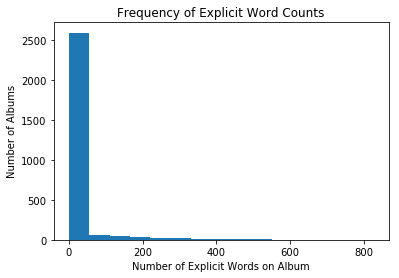

In [5]:
# creating histogram of explicit_count using full dataset

plt.hist(albums["explicit_count"], bins=15)
plt.title("Frequency of Explicit Word Counts")
plt.xlabel("Number of Explicit Words on Album")
plt.ylabel("Number of Albums")
plt.show()

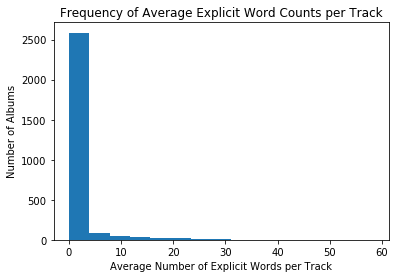

In [6]:
# creating histogram of explicit_avg using full dataset

plt.hist(albums["explicit_avg"], bins=15)
plt.title("Frequency of Average Explicit Word Counts per Track")
plt.xlabel("Average Number of Explicit Words per Track")
plt.ylabel("Number of Albums")
plt.show()

Clearly, both of the above distributions are notably skewed left, with most albums in the dataset containining 100 or less explicit words (or roughly five or less explicit words per track.) The computed averages of 20.418 explicit words per album and 1.404 explicit words per track therefore seem at least partially inflated by a small number of albums featuring heavy explicit content (i.e., over 100 explicit words total, and as many as 600 in some cases.) Specifically, we can observe the following:

In [7]:
# number of albums with no explicit words
num_clean_albums = len(albums[albums["explicit_count"] == 0])

print("There are", num_clean_albums, "albums that contain no explicit words at all.")
print("This represents approximately " + str(round(num_clean_albums/len(albums)*100, 2)) \
      + "% of the albums in the dataset.\n")

# number of albums with over 100 explicit words
num_fairly_explicit_albums = len(albums[albums["explicit_count"] > 100])

print("In contrast, only", num_fairly_explicit_albums, "albums contain more than 100 explicit words.")
print("This represents approximately " + str(round(num_fairly_explicit_albums/len(albums)*100, 2)) \
      + "% of the albums in the dataset.\n")

# number of albums with over 200 explicit words
num_very_explicit_albums = len(albums[albums["explicit_count"] > 200])

# number of albums with over 400 explicit words
num_extremely_explicit_albums = len(albums[albums["explicit_count"] > 400])

print("For further comparisons, there are", num_very_explicit_albums, \
      "albums containing more than 200 explicit words, and", num_extremely_explicit_albums, \
      "albums containing more \nthan 400 explicit words.")
print("This represents approximately " + str(round(num_very_explicit_albums/len(albums)*100, 2)) \
      + "%" + " and " + str(round(num_extremely_explicit_albums/len(albums)*100, 2)) \
      + "% of the albums in the dataset, respectively.")

There are 1016 albums that contain no explicit words at all.
This represents approximately 36.08% of the albums in the dataset.

In contrast, only 163 albums contain more than 100 explicit words.
This represents approximately 5.79% of the albums in the dataset.

For further comparisons, there are 85 albums containing more than 200 explicit words, and 22 albums containing more 
than 400 explicit words.
This represents approximately 3.02% and 0.78% of the albums in the dataset, respectively.


With this in mind, we therefore recreate the above histograms, excluding all albums that contain more than 100 explicit words:

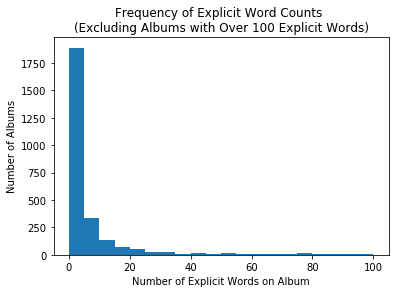

In [8]:
# creating histogram of explicit_count, while excluding albums containing more than 100 explicit words

plt.hist(albums[albums["explicit_count"] <= 100]["explicit_count"], bins=np.arange(0, 105, 5))
plt.title("Frequency of Explicit Word Counts \n(Excluding Albums with Over 100 Explicit Words)")
plt.xlabel("Number of Explicit Words on Album")
plt.ylabel("Number of Albums")
plt.show()

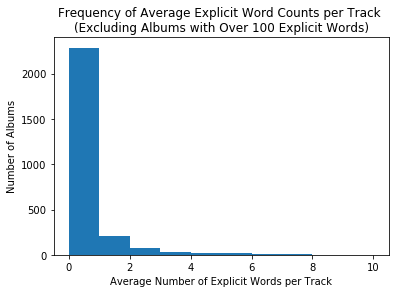

In [9]:
# creating histogram of explicit_avg, while excluding albums containing more than 100 explicit words

plt.hist(albums[albums["explicit_count"] <= 100]["explicit_avg"], bins=np.arange(0, 11, 1))
plt.title("Frequency of Average Explicit Word Counts per Track \n(Excluding Albums with Over 100 Explicit Words)")
plt.xlabel("Average Number of Explicit Words per Track")
plt.ylabel("Number of Albums")
plt.show()

Here, we observe that while the frequency distributions displayed above are still skewed left (due to many albums in the dataset containing no explicit lyrics at all), there still exists hundreds of albums that contain at least *some* explicit content. We now move to explore the critical reception the albums in the dataset received.

##### Exploring Data on Critical Reception

As mentioned above, critical reception for each album is measured using `metascore`, an aggregate critical score in the 0-100 range computed by Metacritic.

In [10]:
# computing mean and standard deviations of metascores

print("The average metascore of the albums in the dataset is approximately", round(albums["metascore"].mean(), 3))
print("The standard deviation of album metascores is approximately", round(albums["metascore"].std(), 3))

The average metascore of the albums in the dataset is approximately 75.351
The standard deviation of album metascores is approximately 7.379


It is also worth noting the general ranges which Metacritic divides the full 0-100 scale into:
<br><br><img src="metacritic_ranges.jpg">
<center>([Source](https://www.metacritic.com/about-metascores))</center>

We therefore see that on average, the albums in this dataset received "generally favorable reviews," based off the average metascore of 75.351. We can also compute and visualize the distribution of the metascores in the dataset based off the above method of categorization:

In [11]:
# computing number of albums in each category

num_universal_acclaim = len(albums[(albums["metascore"] >= 81) & (albums["metascore"] <= 100)])
num_generally_favorable = len(albums[(albums["metascore"] >= 61) & (albums["metascore"] <= 80)])
num_mixed_or_average = len(albums[(albums["metascore"] >= 40) & (albums["metascore"] <= 60)])
num_generally_unfavorable = len(albums[(albums["metascore"] >= 20) & (albums["metascore"] <= 39)])
num_overwhelming_dislike = len(albums[(albums["metascore"] >= 0) & (albums["metascore"] <= 19)])

|                               | Number of Albums in Category | Percentage of Albums in Category |
|:------------------------------|:----------------------------:|:--------------------------------:|
| Universal Acclaim             | 695                          | 24.68%                           |
| Generally Favorable Reviews   | 2013                         | 71.48%                           |
| Mixed or Average Reviews      | 106                          | 3.76%                            |
| Generally Unfavorable Reviews | 2                            | 0.07%                            |
| Overwhelming Dislike          | 0                            | 0.00%                            |

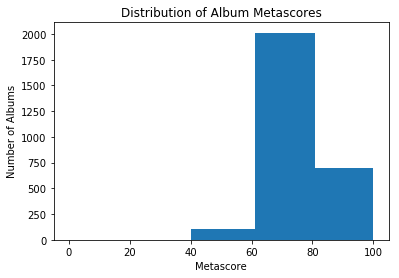

In [12]:
# creating histogram of metascores to visualize number of albums in each Metacritic category

plt.hist(albums["metascore"], bins=[0, 20, 40, 61, 81, 100])
plt.title("Distribution of Album Metascores")
plt.xlabel("Metascore")
plt.ylabel("Number of Albums")
plt.show()

Evidently, albums tend to receive generally positive reviews much more often than generally negative reviews, with zero albums in the dataset falling into the "Overwhelming Dislike" category and only two falling into the "Generally Unfavorable Reviews" category. Therefore, if the presence of explicit content on an album *does* have a perceptible impact on that album's critical reception, that impact is unlikely to be very drastic, given that most albums receive relatively favorable reviews anyways.

Before moving on to linear regression analysis, it could be helpful to plot `explicit_count` vs. `metascore`, as well as `explicit_avg` vs. `metascore` to obtain a broad idea on how much the "explicitness" of an album impacts its metascore:

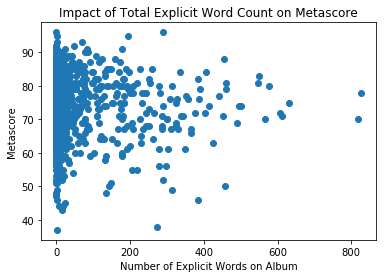

In [13]:
# creating scatterplot for explicit_count vs. metascore

plt.scatter(albums["explicit_count"], albums["metascore"])
plt.xlabel("Number of Explicit Words on Album")
plt.ylabel("Metascore")
plt.title("Impact of Total Explicit Word Count on Metascore")
plt.show()

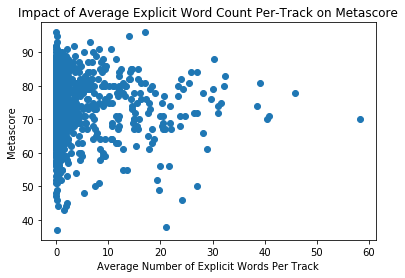

In [14]:
# creating scatterplot for explicit_avg vs. metascore

plt.scatter(albums["explicit_avg"], albums["metascore"])
plt.xlabel("Average Number of Explicit Words Per Track")
plt.ylabel("Metascore")
plt.title("Impact of Average Explicit Word Count Per-Track on Metascore")
plt.show()

Of course, these scatterplots alone are not sufficient enough to finalize any specific conclusion; but at least from this superficial perspective, it seems that neither the presence nor the frequency of explicit content on an album tends to cause a significant difference in critical reception. We now will use linear regression to more formally confirm these observations.

##### Linear Regression Analysis

We first fit a linear regression that predicts `metascore` given `explicit_count`:

In [16]:
# fitting linear model that predicts metascore given explicit_count
count_metascore_model = LinearRegression().fit(albums[["explicit_count"]], albums["metascore"])

# computing regression slope, intercept, and r^2 score
print("Regression slope (when predicting metascore given number of explicit words on album):", \
      float(count_metascore_model.coef_))
print("Regression intercept (when predicting metascore given number of explicit words on album):", \
      count_metascore_model.intercept_)
print("r^2 score (when predicting metascore given number of explicit words on album):", \
      count_metascore_model.score(albums[["explicit_count"]], albums["metascore"]))

Regression slope (when predicting metascore given number of explicit words on album): -0.007863427084692324
Regression intercept (when predicting metascore given number of explicit words on album): 75.5114074812
r^2 score (when predicting metascore given number of explicit words on album): 0.00520989643345


As expected, this model does not seem to indicate a notable linear relationship between the number of explicit words on an album and its critical reception. More specifically:

- This model suggests that for every additional explicit word on an album, the album's metascore falls by approximately 0.00786. This is clearly a very negligible difference, as it would require roughly $\frac{1}{0.00786}\approx127$ explicit words on an album just to lower its metascore by 1.


- In addition, this model suggests that when an album contains zero explicit words, its metascore is, on average, roughly 75.511. However, we can compute the average metascore of all albums that contain at least one explicit word:

In [17]:
# computing average metascore of albums with explicit lyrics
explicit_avg_metascore = albums[albums["explicit_count"] > 0]["metascore"].mean()

print("The average metascore for albums with at least one explicit word is approximately", \
      round(explicit_avg_metascore, 3))

The average metascore for albums with at least one explicit word is approximately 74.977


We see that there is only a minor difference in average metascores, specifically a difference of $75.511 - 74.977 = 0.534$. Considering that metascores are calculated on an integer scale from 0-100, a difference of roughly half a point is fairly insignificant.

- Finally, the r^2 score of almost zero indicates that using a linear model that predicts `metascore` given `explicit_count` does not fit the data very well. In other words, this is yet another sign that there does not exist a linear relationship at all between `metascore` and `explicit_count`.

Now, we fit a linear regression that predicts `metascore` given `explicit_avg`:

In [18]:
# fitting linear model that predicts metascore given explicit_avg
avg_metascore_model = LinearRegression().fit(albums[["explicit_avg"]], albums["metascore"])

# computing regression slope, intercept, and r^2 score
print("Regression slope (when predicting metascore given average # of explicit words per album track):", \
      float(avg_metascore_model.coef_))
print("Regression intercept (when predicting metascore given average # of explicit words per album track):", \
      avg_metascore_model.intercept_)
print("r^2 score (when predicting metascore given average # of explicit words per album track):", \
      avg_metascore_model.score(albums[["explicit_avg"]], albums["metascore"]))

Regression slope (when predicting metascore given average # of explicit words per album track): -0.1117368164823591
Regression intercept (when predicting metascore given average # of explicit words per album track): 75.5077014787
r^2 score (when predicting metascore given average # of explicit words per album track): 0.00433021173161


This model yields mostly the same insights as the previous model, as it implies the following:

- For every additional explicit word per album track, that album's metascore falls by approximately 0.11174. Put differently, every increase of approximately $\frac{1}{0.11174}\approx9$ explicit words per track results in a one-point decrease in album metascore.


- Albums that feature zero explicit words per track receive an average metascore of roughly 75.508. (This is, of course, approximately the same average metascore given to albums with no explicit words at all, as expected.)


- The r^2 score of almost zero indicates that using a linear model that predicts `metascore` given `explicit_avg` does not explain the variation in the data very well.

Overall, it certainly seems that none of the evidence collected thus far supports the existence of any linear relationship between the amount of expliict content on an album and its critical reception.

<div style="border-bottom: 4px solid #AAA; padding-bottom: 6px; font-size: 16px; font-weight: bold;"></div>

# Evaluation of Significance

Although neither of the linear regression models above revealed any notable patterns between the "explicitness" of an album and its critical reception, it still is reasonable to compare the results from above to simple randomness, using a permutation test. In this way, we can ensure that the results obtained above are unlikely to have arisen due to random chance.

We begin by creating 10,000 random permutations of our `metascore` data using the `get_permutation()` function below. For each permutation, we then fit a linear regression that predicts the permutated data given the original `explicit_count` data, and save the resulting regression slope for later visualization:

In [20]:
# Returns a random permutation of the provided array, data.
def get_permutation(data):
    return np.random.permutation(data)

In [22]:
# array to store the randomly generated regression slopes
permutation_slopes_for_total = np.zeros(10000)

for i in range(10000):
    permutation = get_permutation(albums["metascore"].copy())
    
    # fits a linear regression that predicts the permuted metascore data, 
    # given the original explicit_count data
    model = LinearRegression().fit(albums[["explicit_count"]], permutation)
    
    # stores regression slope of linear model above
    permutation_slopes_for_total[i] = float(model.coef_)

Having generated the 10,000 regression slopes, we now want to analyze how many of these slopes are more negative than the regression slope of `count_metascore_model` (the linear model created in the last section that predicts the original `metascore` data given the `explicit_count` data.) If a significant number of the randomly generated regression slopes are more negative than this original regression slope, this could very well indicate that our original results likely arose from random chance.

We therefore create a histogram to visualize the distribution of the randomly generated regression slopes. To more easily identify the regression slopes that are more negative than the original, we will highlight all such regression slopes in red, and leave the rest blue.

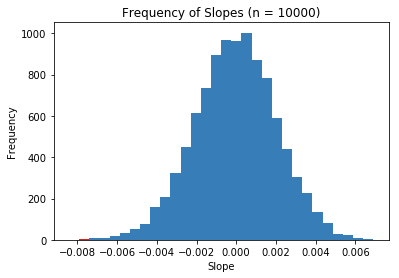

In [26]:
# obtain color palette used for coloring histogram below
palette = plt.get_cmap("Set1")

# the regression slope of the linear model that predicts
# the original metascore data given the explicit_count data
original_slope_for_total = float(count_metascore_model.coef_)

# keeps track of number of regression slopes that are more negative 
# than original_slope_for_total
num_more_negative_slopes_for_total = 0

_, bins_for_total, patches_for_total = plt.hist(permutation_slopes_for_total, bins=30)
for b, p in zip(bins_for_total, patches_for_total):
    color = palette(1)
    if b < original_slope_for_total:
        color = palette(0)
        num_more_negative_slopes_for_total += 1
    p.set_facecolor(color)
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.title("Frequency of Slopes (n = 10000)")
plt.show()

Based off this histogram, it does not appear there are many randomly generated regression slopes that are more negative than the original regression slope. The following computation confirms this:

In [27]:
print("Out of the 10,000 regression slopes generated randomly above, only " + str(num_more_negative_slopes_for_total) \
      + " are more negative than the original \nregression slope of " + str(original_slope_for_total) + ".")

Out of the 10,000 regression slopes generated randomly above, only 2 are more negative than the original 
regression slope of -0.007863427084692324.


In other words, considering that only $\frac{2}{10000}=0.02\%$ of the randomly generated regression slopes are more negative than the original regression slope, it appears extremely unlikely that the original regression slope was the result of random chance. This serves as yet another indication that there is no discernible linear relationship between the number of explicit words on an album and its critical reception.

We can conduct a similar simulation examining `explicit_avg` instead of `explicit_count`:

In [28]:
# array to store the randomly generated regression slopes
permutation_slopes_for_avg = np.zeros(10000)

for i in range(10000):
    permutation = get_permutation(albums["metascore"].copy())
    
    # fits a linear regression that predicts the permuted metascore data, 
    # given the original explicit_avg data
    model = LinearRegression().fit(albums[["explicit_avg"]], permutation)
    
    # stores regression slope of linear model above
    permutation_slopes_for_avg[i] = float(model.coef_)

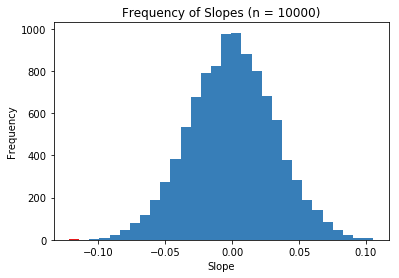

In [29]:
# the regression slope of the linear model that predicts
# the original metascore data given the explicit_avg data
original_slope_for_avg = float(avg_metascore_model.coef_)

# keeps track of number of regression slopes that are more negative 
# than original_slope_for_avg
num_more_negative_slopes_for_avg = 0

_, bins_for_avg, patches_for_avg = plt.hist(permutation_slopes_for_avg, bins=30)
for b, p in zip(bins_for_avg, patches_for_avg):
    color = palette(1)
    if b < original_slope_for_avg:
        color = palette(0)
        num_more_negative_slopes_for_avg += 1
    p.set_facecolor(color)
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.title("Frequency of Slopes (n = 10000)")
plt.show()

In [30]:
print("Out of the 10,000 regression slopes generated randomly above, only " + str(num_more_negative_slopes_for_avg) \
      + " are more negative than the original \nregression slope of " + str(original_slope_for_avg) + ".")

Out of the 10,000 regression slopes generated randomly above, only 2 are more negative than the original 
regression slope of -0.1117368164823591.


We therefore see that it seems very unlikely that the original regression slope (of the linear model that predicts the original `metascore` data given the `explicit_avg` data) arose from random chance. This only further reinforces what we found earlier: namely, that no linear relationship seems to exist between either the quantity or frequency of explicit content on an album and that album's critical reception.

<div style="border-bottom: 4px solid #AAA; padding-bottom: 6px; font-size: 16px; font-weight: bold;"></div>

# Conclusion

Overall, through data visualizations, linear regression analysis, and permutation testing, the results above consistently confirm that the amount of explicit lyrics on an album typically does not have any significant impact on that album's critical reception. It therefore appears that, just because explicit music has grown so much in popularity as of late, music critics still evaluate albums fairly, without weighing commercial success or lyricism too heavily when writing their reviews. This in turn implies that music fans can continue to trust and rely upon critics' album reviews to learn about new releases and explore which albums potentially deserve more attention.

From here, it would be interesting to run similar analysis on a more expansive dataset, specifically one that includes albums released before 2015 (since this study only focuses on albums released in the 2015-2019 range.) With the inclusion of enough albums, this expanded dataset could possibly be used to analyze whether critic reviews of explicit albums have changed over the last few decades--which is certainly a possibility, given that censorship in music was once significantly more stringent than it is today. Such a study could also reveal the underlying cultural shift towards more "radical" forms of entertainment, i.e. entertainment that more shamelessly includes profane or suggestive content. Finally, using a more comprehensive list of words that should be considered "explicit" (ex: possibly a list that accounts for different languages, regional slang, etc.) could allow for more accurate judgments of how much "explicit" content any given album really contains.

<div style="border-bottom: 4px solid #AAA; padding-bottom: 6px; font-size: 16px; font-weight: bold;"></div>

# Source Code

All code pertaining to this study can be found in [this repository](https://github.com/genghisshyy/INFO_2950_FinalProject).

<div style="border-bottom: 4px solid #AAA; padding-bottom: 6px; font-size: 16px; font-weight: bold;"></div>

# Acknowledgements

All works cited in this report are presented below:
<br><br>

Bannister, Mark. "The Billboard Hot 100: Exploring Six Decades of Number One 
     Singles." GitHub, Apr. 2017, [Repository Link](https://github.com/mspbannister/dand-p4-billboard/blob/master/Billboard_analysis__100417_.md#the-billboard-hot-100-exploring-six-decades-of-number-one-singles). Accessed 16 May 2020.
     
"Best Music and Albums for 2020." Metacritic, [Page Link](https://www.metacritic.com/browse/albums/score/metascore/year/filtered?view=condensed&sort=desc). Accessed 16 May 2020.

"Chart History: Prince." Billboard, [Page Link](www.billboard.com/music/prince/chart-history/HSI/song/333454). Accessed 16 May 2020.

"How We Create the Metascore Magic." Metacritic, [Page Link](https://www.metacritic.com/about-metascores). Accessed 19 May 2020.

Ross, Eleanor. "Parental Advisory: How Songs with Explicit Content Came to 
     Dominate the Charts." Newsweek, 13 Apr. 2017, [Page Link](https://www.newsweek.com/songs-explicit-lyrics-popular-increase-billboard-spotify-583551). Accessed 16 May 2020. 

<br>Additionally, I would like to thank Metacritic and Genius for providing the raw data necessary to conduct this study.